# <center>Assignment 2</center> 
<div style="text-align: right"><b>-By Shivam Sharma
 <br>04251202719
 <br>CSE (II)</b></div>

In [77]:
from sklearn.datasets import load_iris,load_boston
import pandas as pd 
import numpy as np
import math as mt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import mean_squared_error as ms
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 9]

 # Task-1 function for Mean, Median, Mode, Mean square value, Standard deviation, Variance

In [78]:
"""
arr - is a pre-defined array with int type elements.
n - is length of array a.k.a Number of elements.
"""
def mean(arr):
    n = len(arr) 
    return sum(arr)/n

def median(arr):
    n = len(arr)
    if n%2 == 0:
        return (arr[int((n/2)-1)]+arr[int(n/2)])/2
    else:
        return arr[int((n)/2)]

def mode(arr):
    arr.sort()
    #count the # of times each dig. comes
    i=0
    count_arr = []
    while(i<len(arr)):
        count_arr.append(arr.count(arr[i]))
        i+=1
    #zip the elements and thier count together.
    mode_dict = dict(zip(arr,count_arr))
    m = [k for (k,v) in mode_dict.items() if v == max(count_arr)]
    return m
    # the mode will be value that has val in dict same as max element of count_array
    
def MSE(arr,arr_hat):
    if(len(arr) == len(arr_hat)):
        mse = []
        i=0
        diff=list()
        while(i<len(arr)):
            diff.append(round((arr[i] - arr_hat[i])**2,2))
            i+=1
        return sum(diff)/len(arr)
    
def StandardDev(arr,string): # String tells if a sample is passed or whole population.
    x_bar = mean(arr)
    i=0
    diff=list()
    while(i<len(arr)):
        diff.append(round((arr[i] - x_bar)**2,2))
        i+=1
    if string == 's':
        return round(mt.sqrt(sum(diff)/(len(arr)-1))) # len(arr) - 1 is using sample of data.
    elif string == 'p':
        return round(mt.sqrt(sum(diff)/len(arr)))      
    
def variance(arr,string):
    return StandardDev(arr,string) **2

In [79]:
ar1 =[ 41,45,49,47,44]
ar2 = [43.6,44.4,45.2,46,46.8]
ar3 =[ 44,   50,   38,   96,   42,   47,   40,   39,   46,   50]
ar4 = [600 ,470 ,170 , 430 , 300]
ar5 = [1,2,3,2,1,12,5,3,1,7]


In [80]:
print("\n Mean:",mean(ar1))
print("\n Median Odd Elements:",median(ar1)) #odd elements
print("\n Median even Elements:",median(ar3)) #Even elements
print("\n Mode:",mode(ar5))
print("\n Mean Squared Error:",MSE(ar1,ar2))

print("\n Standar Dev Sample:",StandardDev(ar4,'s'))
print("\n Standar Dev Population:",StandardDev(ar4,'p'))

print("\n Variance:",variance(ar4,'p'))


 Mean: 45.2

 Median Odd Elements: 49

 Median even Elements: 44.5

 Mode: [1]

 Mean Squared Error: 6.08

 Standar Dev Sample: 165

 Standar Dev Population: 147

 Variance: 21609


# Task 2

In [81]:
boston = load_boston()
X = boston.data
Y = boston.target.reshape(-1,1)
print(X.shape)
print(Y.shape)
X = pd.DataFrame(X,columns = boston.feature_names)
X.head()

(506, 13)
(506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


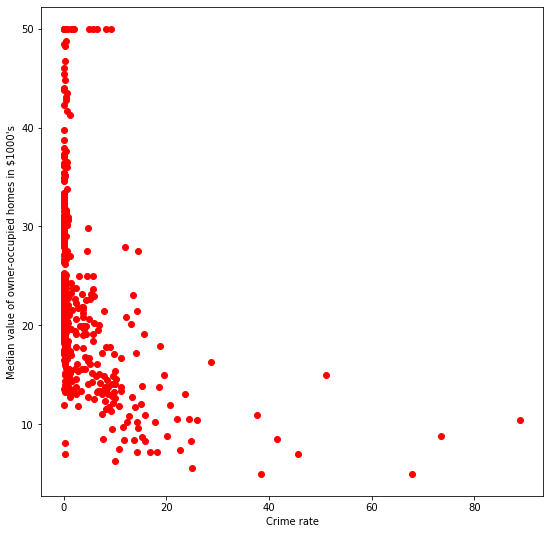

In [82]:
plt.scatter(X['CRIM'],Y,  color='red')
plt.xlabel("Crime rate")
plt.ylabel("Median value of owner-occupied homes in $1000's") # target value
plt.show()

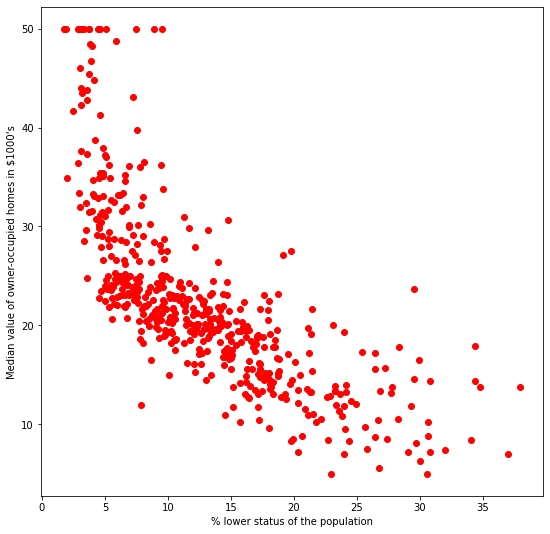

In [83]:
plt.scatter(X['LSTAT'],Y,  color='red')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's") # target value
plt.show()

# Better Plot is 2nd.
a.k.a  % lower status of the population -vs- Median value of owner-occupied homes in $1000's 
gives us better behaviour as a linear regression line.

(253, 1)
(253, 1)
(253, 1)
(253, 1)
Coefficients:  [[-1.01807295]]
Intercept:  [35.58466877]
Mean absolute error: 4.57
Residual sum of squares (MSE): 37.73
R2-score: 0.28


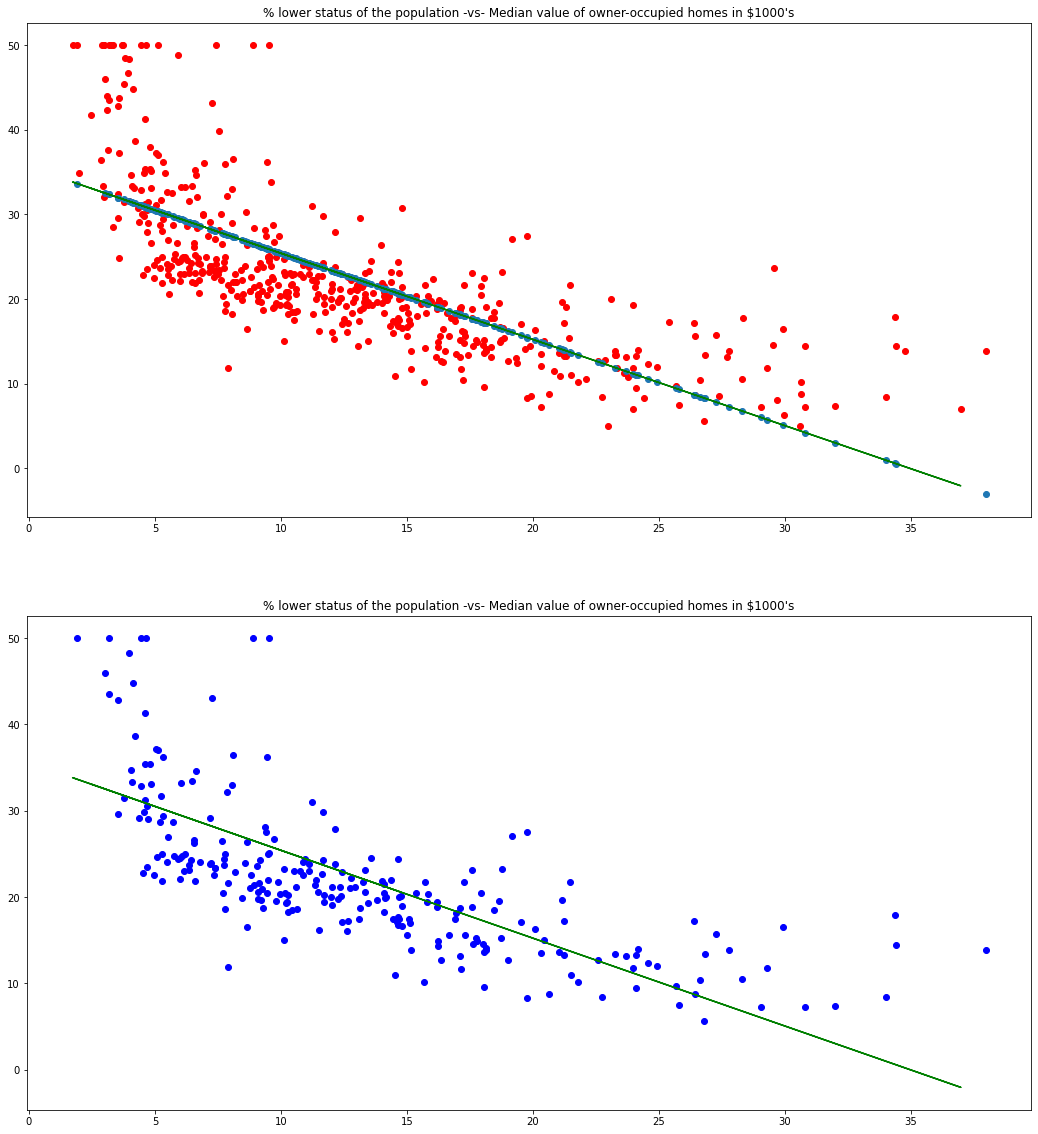

In [84]:
regr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X['LSTAT'], Y, test_size=0.5, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
#Shape of data - Train and Test.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_hat = regr.fit(X_train, y_train).predict(X_test)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
# PLOTS 
fig, axes = plt.subplots(2, 1, figsize=(18,20), sharey=False)
axes[0].scatter(X['LSTAT'],Y,  color='red')
axes[0].scatter(X_test,y_hat)
axes[0].plot(X_train, regr.coef_*X_train + regr.intercept_, 'g')

axes[1].scatter(X_test,y_test,  color='b')
axes[1].plot(X_train, regr.coef_*X_train + regr.intercept_, 'g')
axes[0].set_title("% lower status of the population -vs- Median value of owner-occupied homes in $1000's")
axes[1].set_title("% lower status of the population -vs- Median value of owner-occupied homes in $1000's")

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, y_test) )

# Task 3

In [85]:
data = pd.read_csv("SaratogaHouses.csv")
data.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


## Plots - Attributes taken and Linear Regression Line

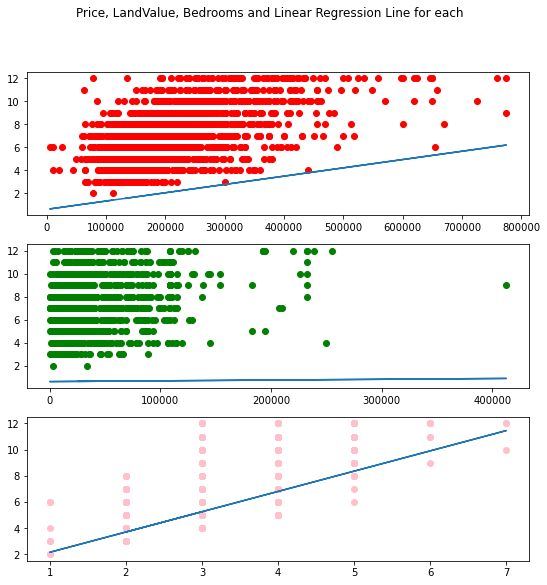

In [86]:
X1 = data.price.values.reshape(-1,1)
X2 = data.landValue
X3 = data.bedrooms
X = data[['price','landValue','bedrooms']]
Y = data.rooms.values.reshape(-1,1)
regr = LinearRegression()
Model = regr.fit(X,Y)
fig, axs = plt.subplots(3)
fig.suptitle('Price, LandValue, Bedrooms and Linear Regression Line for each')
axs[0].scatter(X1,Y,color='r')
axs[0].plot(X1, Model.coef_[0][0]*X1 + Model.intercept_)
axs[1].scatter(X2,Y,color='g')
axs[1].plot(X2, Model.coef_[0][1]*X2+ Model.intercept_)
axs[2].scatter(X3,Y,color='pink')
axs[2].plot(X3,Model.coef_[0][2]*X3+ Model.intercept_)



In [87]:
# Feature Extraction:
from sklearn.metrics import mean_squared_error
ms = mean_squared_error
X = data[['price','landValue','bedrooms']]
Y = data.rooms.values.reshape(-1,1)
regr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
Model = regr.fit(X_train,y_train)
Yhat = regr.fit(X_train,y_train).predict(X_test)
print(ms(y_test,Yhat))

2.429525523359493


In [88]:
#Taking Values
P = int(input("Enter values of Price:"))
LV = int(input("Enter values of LandValue:"))
BE = int(input("Enter values of bedrooms:"))
aa = X[X.price == P ][X.landValue == LV][X.bedrooms == BE].values
data[data.price==aa[0][0]] # value from data 367500 78200 3

Enter values of Price:367500
Enter values of LandValue:78200
Enter values of bedrooms:3


D:\ML\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
648,649,367500,0.27,2,78200,2205,57,3,1,2.5,10,hot air,gas,public/commercial,No,No,Yes


In [89]:
#Lets Predict:
yy = data[data.price==aa[0][0]].rooms.values
rooms_preds  = Model.predict(aa)
print(f"Number of Rooms predicted from Price:{P}, Land Value: {LV}, Bedroom: {BE} are -> ",rooms_preds[0][0])
print("\n Error in calculation:", ms(rooms_preds,yy)," \n Actual Value", yy[0] ,"\n Predicted value",int(Model.predict(aa)))

Number of Rooms predicted from Price:367500, Land Value: 78200, Bedroom: 3 are ->  7.832117295621134

 Error in calculation: 4.699715419945026  
 Actual Value 10 
 Predicted value 7


# Task 4

In [90]:
data = load_iris()
X = data.data
y = data.target.reshape(-1,1)

print("x shape",X.shape)
print("y shape",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# model 
gnb = GaussianNB() 
mnb = MultinomialNB()
bnb = BernoulliNB()

y_predgnb = gnb.fit(X_train, y_train).predict(X_test)
y_predmnb = mnb.fit(X_train, y_train).predict(X_test)
y_predbnb = bnb.fit(X_train, y_train).predict(X_test)
print("\n## MSE scores ##")
print("   GNB",round(ms(y_test,y_predgnb),3),"\n   MNB ",ms(y_test,y_predmnb),"\n   BNB",ms(y_test,y_predbnb))

x shape (150, 4)
y shape (150, 1)

## MSE scores ##
   GNB 0.053 
   MNB  0.4 
   BNB 1.68


D:\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Task 5

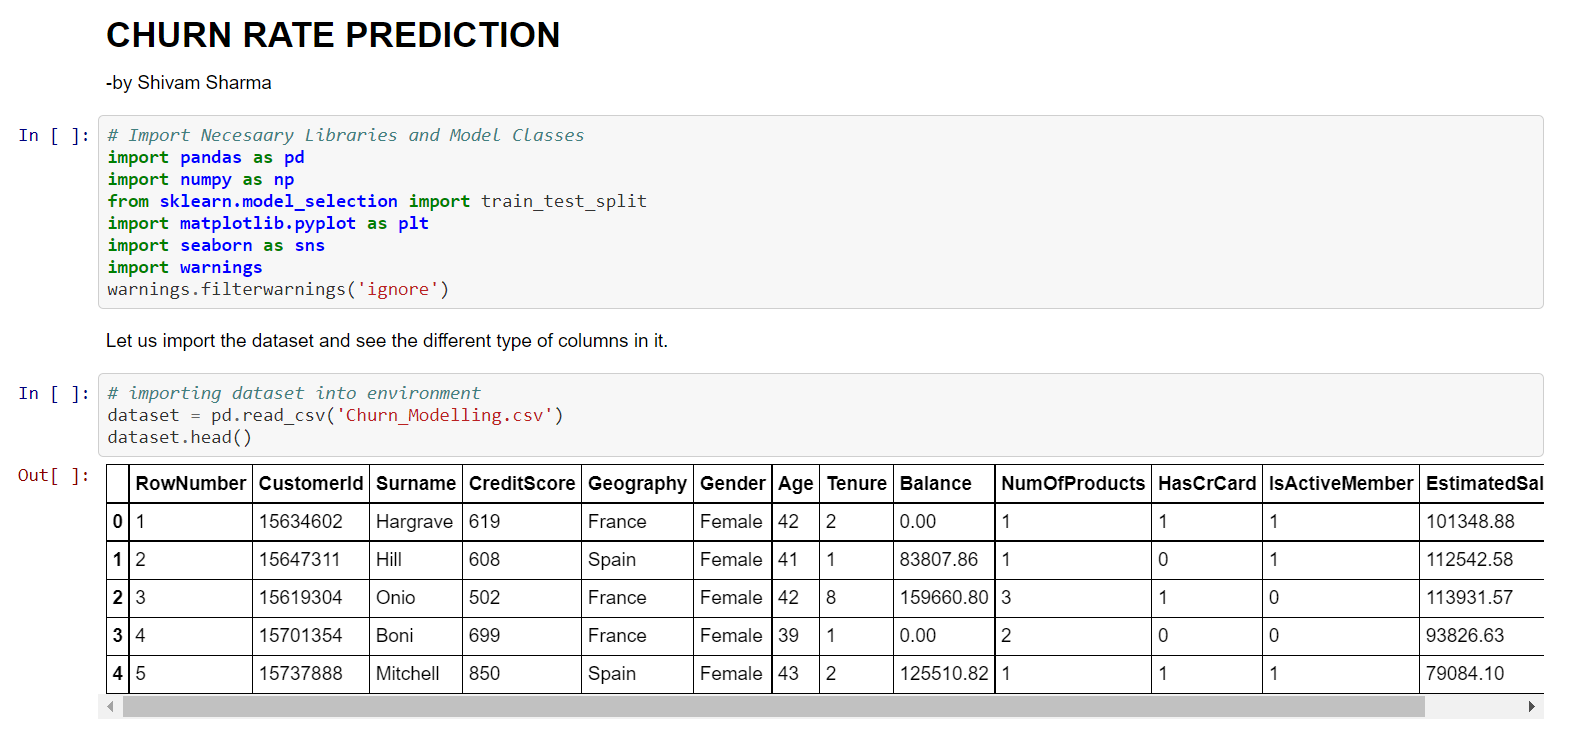

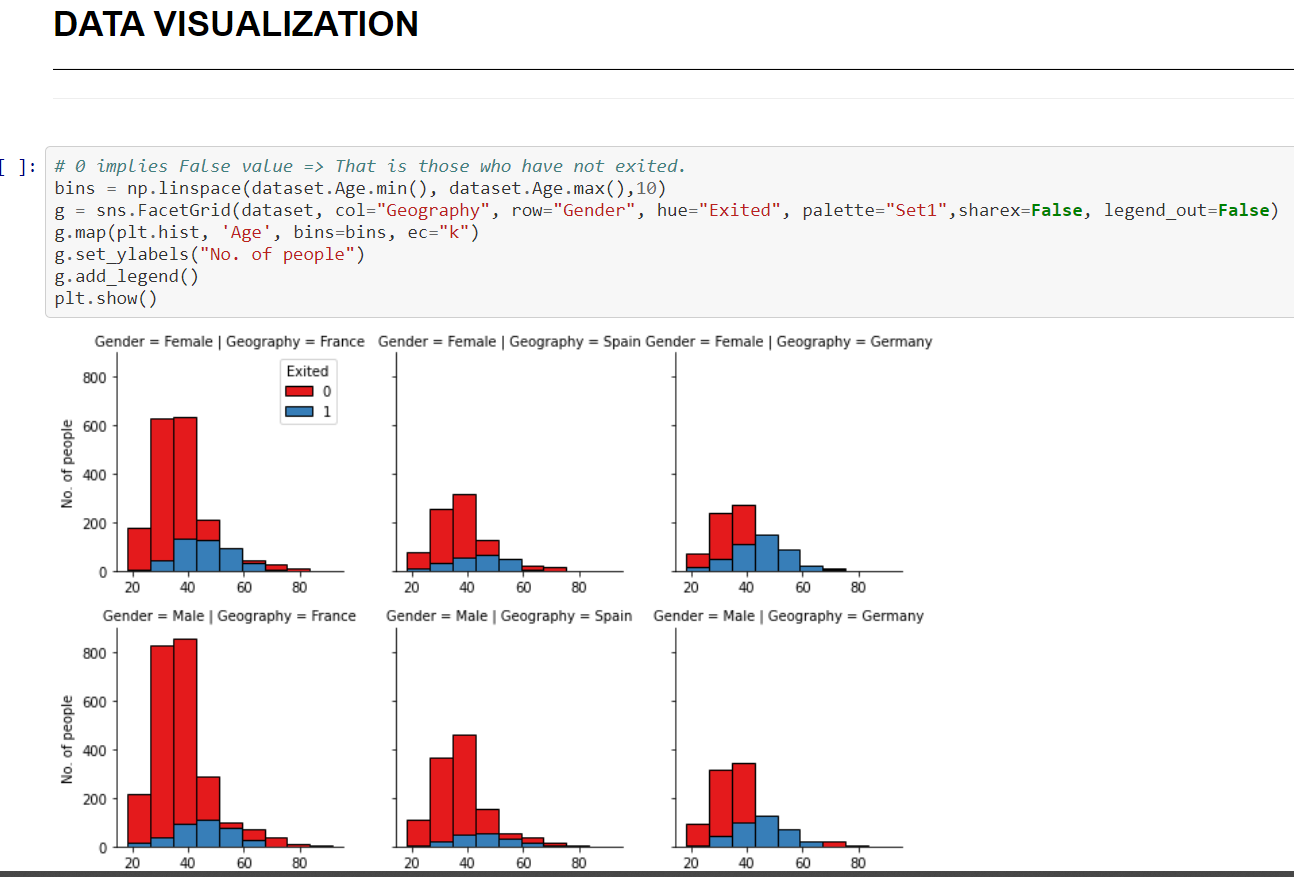

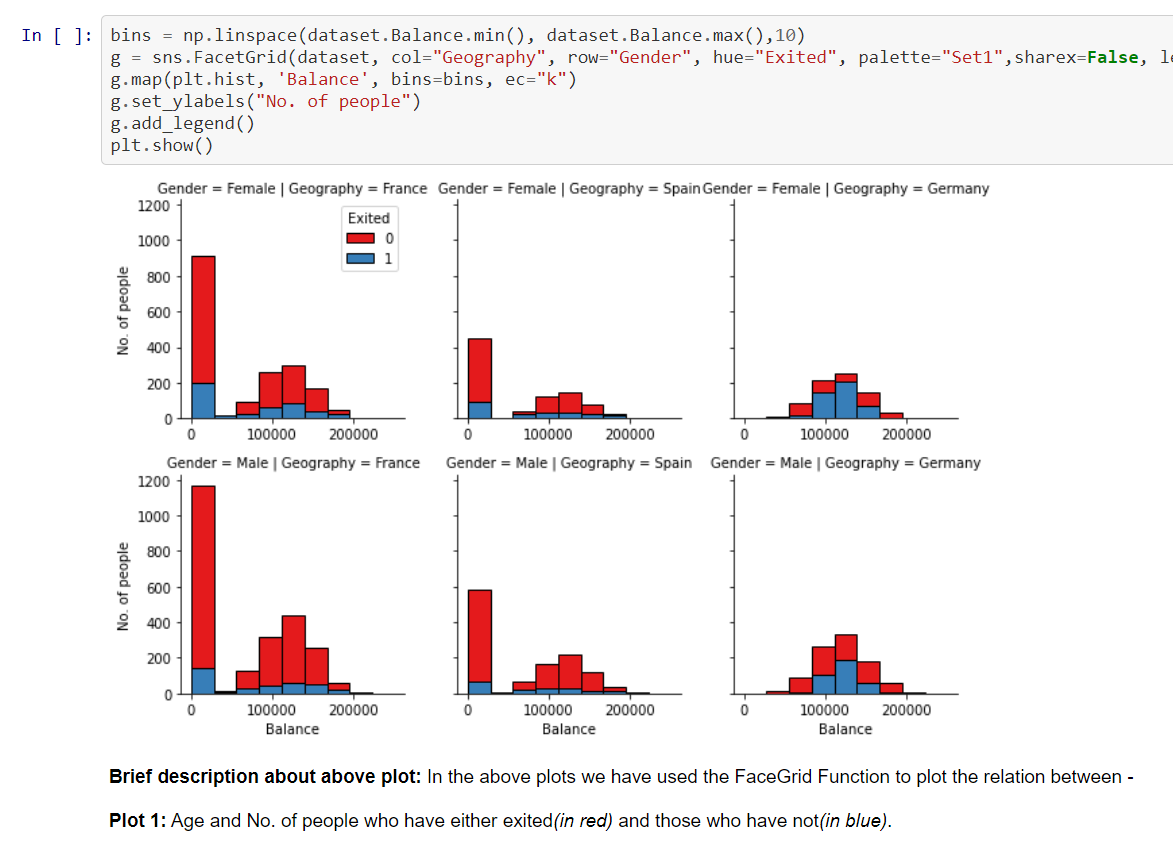

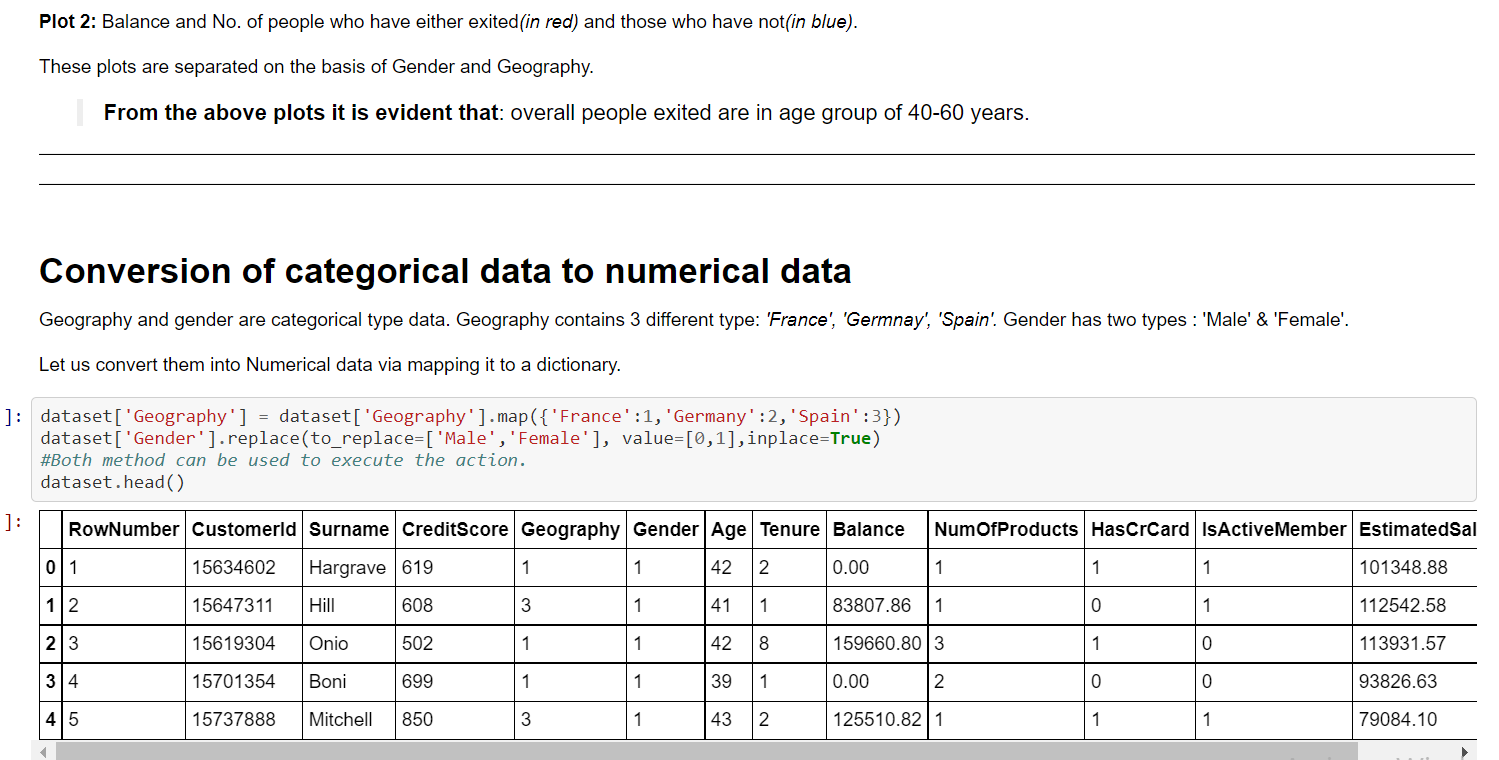

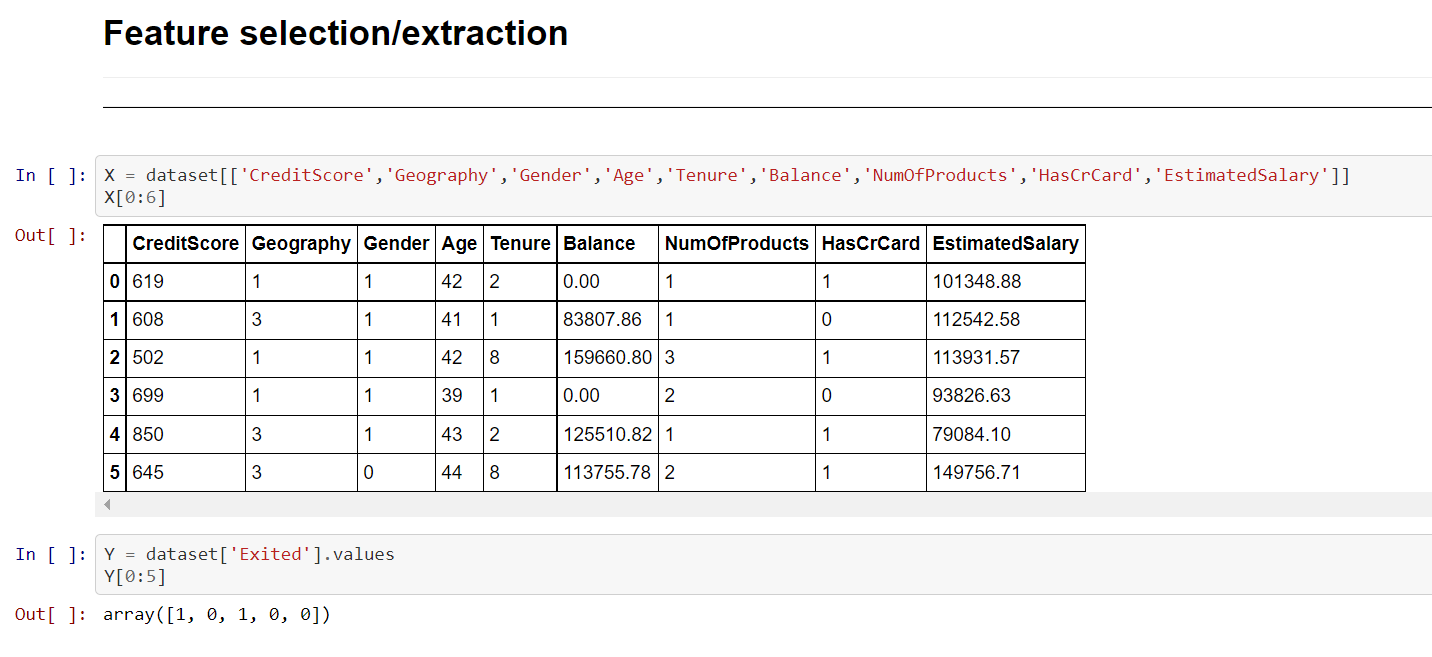

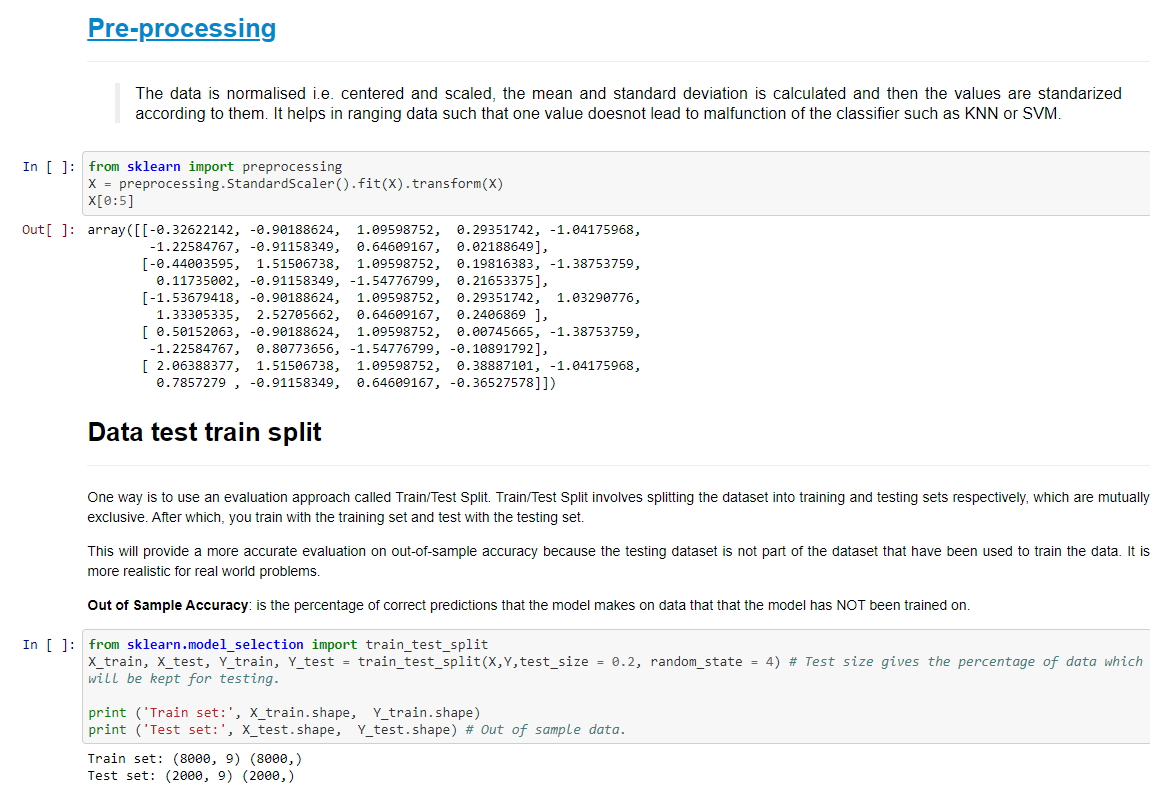

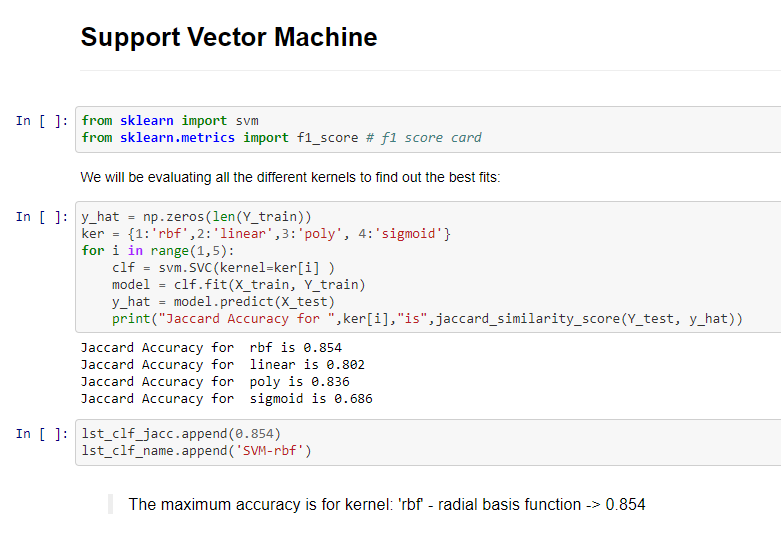